# **Ejercicios de pair programming Módulo 2 Sprint 1**
## **Estadística: Lección 3**
### **Tablas de contingencia, correlación, sesgos e intervalos de confianza**

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew

In [53]:
games = pd.read_csv("data/games.csv", index_col = 0)

In [54]:
games.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,39000,39000,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world game with RPG elements such as stats, w...","[""The first playthrough of elden ring is one of the best eperiences gaming can offer y...",17000,38000,46000,48000
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,29000,29000,"['Adventure', 'Brawler', 'Indie', 'RPG']","A rogue-lite hack and slash dungeon crawler in which Zagreus, son of Hades the Greek g...",['convinced this is a roguelike for people who do not like the genre. The art is techn...,21000,32000,63000,36000
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No. 3']",4.4,43000,43000,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the first 3D open-world game in the Zelda s...,['This game is the game (that is not CS:GO) that I have played the most ever. I have p...,30000,25000,5000,26000
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,35000,35000,"['Adventure', 'Indie', 'RPG', 'Turn Based Strategy']","A small child falls into the Underground, where monsters have long been banished by hu...",['soundtrack is tied for #1 with nier automata. a super charming story and characters...,28000,679,49000,18000
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3000,3000,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close combat and exploration in which the player...,"[""this games worldbuilding is incredible, with its amazing soundtrack and gorgeous art...",21000,24000,83000,23000


1. Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
- Tabla de contingencia


In [38]:
# No tenemos "buenas" variables categóricas para buscar correlaciones por lo que vamos a categorizar dos variables númericas, "rating" y "number of reviews" que apriori pensamos que pueden tener relación.

In [56]:
def cambiar_rating(col):
    if col < 2.50:
        return "suspenso"
    elif col < 3.50:
        return "aprobado"
    elif col <= 4.50:
        return "notable"
    else:
        return "sobresaliente"

In [57]:
games["notas_rating"] = games["Rating"].apply(cambiar_rating)

In [58]:
def cambiar_reviews(col):
    if col < 100:
        return "muy poco popular"
    elif col < 500:
        return "poco popular"
    elif col <= 1000:
        return "bastante popular"
    else:
        return "muy popular"

In [59]:
games["popularidad"] = games["Number of Reviews"].apply(cambiar_reviews)

In [48]:
games_crosstab = pd.crosstab(games["notas_rating"], games["popularidad"])
games_crosstab

popularidad,bastante popular,muy poco popular,muy popular,poco popular
notas_rating,,,,
aprobado,88,32,15,214
notable,378,34,334,344
sobresaliente,3,9,9,17
suspenso,6,8,0,21


In [61]:
games["popularidad"].value_counts()

poco popular        596
bastante popular    475
muy popular         358
muy poco popular     83
Name: popularidad, dtype: int64

- Coeficiente de correlación de las variables numéricas del dataset.


In [62]:
games_corr = games.corr(numeric_only = True)
games_corr

,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist
Rating,1.000000,0.392524,0.392524,-0.026843,0.151015,0.393681,0.375355
Times Listed,0.392524,1.000000,1.000000,0.065578,0.477747,0.649100,0.585801
Number of Reviews,0.392524,1.000000,1.000000,0.065578,0.477747,0.649100,0.585801
Plays,-0.026843,0.065578,0.065578,1.000000,-0.030658,0.186266,0.126875
Playing,0.151015,0.477747,0.477747,-0.030658,1.000000,0.429380,0.398100
Backlogs,0.393681,0.649100,0.649100,0.186266,0.429380,1.000000,0.626160
Wishlist,0.375355,0.585801,0.585801,0.126875,0.398100,0.626160,1.000000


- Sesgos de alguna de las variables numéricas del dataset.


In [64]:
games_sesgo = skew(games["Number of Reviews"])
games_sesgo

2.006265605802721

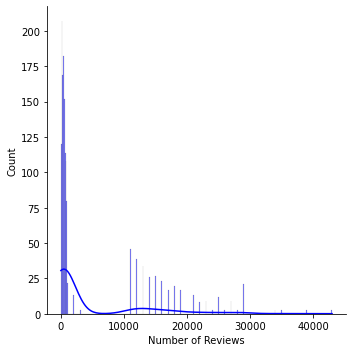

In [65]:
sns.displot(games["Number of Reviews"], color = "b", kde = True)

- Intervalo de confianza de algunas de las variables numéricas del dataset


2. Interpretación de los resultados.
- Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.